<a href="https://colab.research.google.com/github/marcy3ait/AerodinamicaComputacional/blob/master/Simu1_diferenca_finitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Aula 4 - SIMULAÇÃO 1 - AeroComputacional </center>


Implementação do metodo das diferenças finitas para um problema unidimensional.


![texto do link](https://lh3.googleusercontent.com/hQObvDn1nKz6tpCc1NEL0onsBX3PEXYaLvOu-XJpTvwYOcWtAUY664ppO7GrV8qh96xDXpAPOhXz5rKjQqBY5MZNjTw2JEGqyDNhReYkQd32bgbJbjfGqolfH_7xof_dr1uzDxvWkdQcaQr5c4kQ5Lqofs8K8ajxWEmqc_zuzHmuB6rnN9O2SG7VPMlGQl9_mTGMA0bnxZJdGj05AQteveUwU9mtJ6SDfG_FAAwbK3fDpiCnwLNzATIdmrLcsKZC56ydq1avHxPPBtzhhMX1gf-zeQpQ13UlDx57UhRIgeg1pHruarvilqZ-nLD4NRGvYa6gFpx1WW3xHh4JngzzLs3KTGCcbp6YDEI8deyZYh5THbbaZIgiGzd5Eu28CQ3pe52P3setEopAapi6TsR8mnjoN-U6ZbB-J2Y5bvp4c9nc2aEf9VUKwknGc12PQl-_QgYf9gs8p9msPENv3txNst5MBmCF6rsW4_R4MihKKi2XyR21TRckj4bG4-zn7BtxSGQQjmDMzxekeTYLg4iHtLgwuOGHiLvDwVWZcjIU-jN9tscRi2TE81T-d-rx7u4zr9XuS5RU5FZCUqcbMga-IweVk8W4Jln6FTx_gVDKeVi96Y9BtawhTyNgIVXjE5TzWUXU4UkJS-Ny5YIYzvnmHXWRKU2kp-DmKg4lRrdWzJtRbNx1Qqdl-almlMehBQ=w832-h333-no?authuser=0)


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
def simple(n,tf,f):
  '''
  Retorna o plot da derivada de aproximação simples
  Parametros: 
  n: numero de pontos
  tf: valor limite do intervalo [0,tf] - deve ser definido como multiplo inteiro de 2pi
  f: função que a dericada é aplicada
  '''
  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dxdu = np.zeros(n)
  # para ultimo caso
  dxdu[n-1] =  (f[1]-f[n-1])/dx
  
  for i in range(n-1):
    dxdu[i] = (f[i+1]-f[i])/dx
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[:-1],dxdu[:-1],'*', label='S')
  return (e,x,dxdu)

def doubl(n,tf,f):
  '''
  Retorna o plot da derivada de aproximação dupla
  Parametros: 
  n: numero de pontos
  tf: valor limite do intervalo [0,tf] - deve ser definido como multiplo inteiro de 2pi
  f: função que a dericada é aplicada
  '''

  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dxdu = np.zeros(n)
  # para os extremos
  dxdu[0] = (f[1]-f[-2])/(2*dx)
  dxdu[n-1] = (f[1]-f[-2])/(2*dx)

  for i in range(1,n-1):
    dxdu[i] = (f[i+1]-f[i-1])/(2*dx)
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[1:-1],dxdu[1:-1],'+', label='D')
  return (e,x,dxdu)

def tri(n,tf,f):
  '''
  Retorna o plot da derivada de aproximação tripla
  Parametros: 
  n: numero de pontos
  tf: valor limite do intervalo [0,tf] - deve ser definido como multiplo inteiro de 2pi
  f: função que a dericada é aplicada
  '''
 
  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dxdu = np.zeros(n)
  #x[-1](ultimo ponto) == X[0]
  dxdu[0] = (f[-3]-6*f[-2]+3*f[0]+2*f[1])/(6*dx)
  dxdu[1] = (f[-2]-6*f[0]+3*f[1]+2*f[2])/(6*dx)
  dxdu[n-1] = (f[n-3]-6*f[n-2]+3*f[n-1]+2*f[1])/(6*dx)
  for i in range(2,n-1):
    dxdu[i] = (f[i-2]-6*f[i-1]+3*f[i]+2*f[i+1])/(6*dx)
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[2:-1],dxdu[2:-1],'.', label='T')
  return (e,x,dxdu)


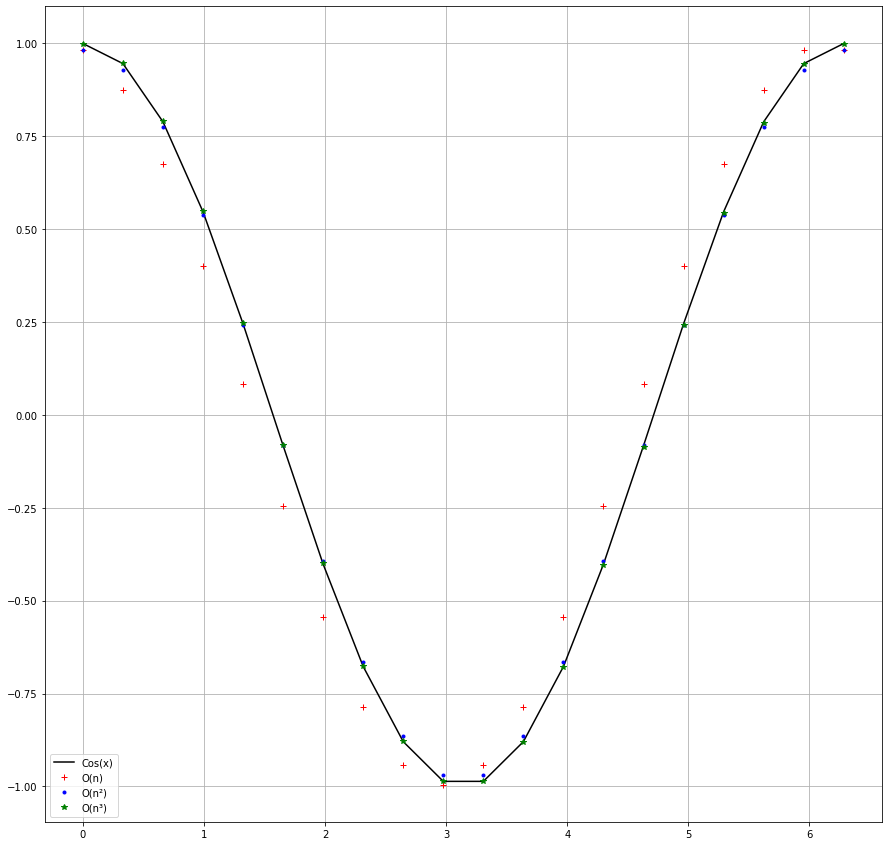

In [ ]:
#@title Plotando o resultado ( 20 pontos de 0 a 2 pi)
n = 20
tf = 2*np.pi
dx = tf/n
x = np.linspace(0,tf,n)
f = np.sin(x)
plt.figure(figsize=(15,15))
plt.grid()
plt.plot(x,np.cos(x),'k', label='Cos(x)')
plt.plot(x,simple(n,tf,f)[2],'+r',Label = 'O(n)')
plt.plot(x,doubl(n,tf,f)[2],'.b',Label = 'O(n²)')
plt.plot(x,tri(n,tf,f)[2],'*g',Label = 'O(n³)')
plt.legend()

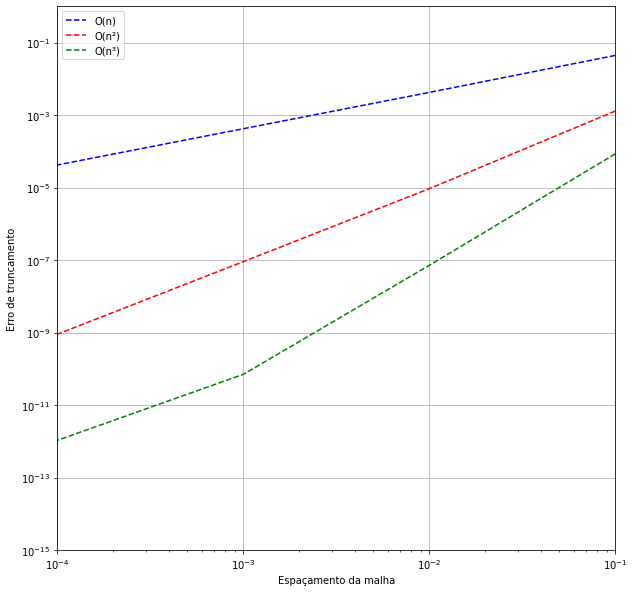

In [ ]:
n = [10**1,10**2,10**3,10**4]
#tf = 2*np.pi
tf = 1
e1 = np.zeros(len(n))
e2 = np.zeros(len(n))
e3 = np.zeros(len(n))
for num,valor in enumerate(n):
  x = np.linspace(0,tf,valor)
  f = np.sin(x)
  e1[num] = simple(valor,tf,f)[0]
  e2[num] = doubl(valor,tf,f)[0]
  e3[num] = tri(valor,tf,f)[0]
  n[num] = 1/n[num]
plt.figure(figsize=(10,10))
plt.yscale("log")
plt.xscale("log")
plt.plot(n,e1,'--b',Label = 'O(n)')
plt.plot(n,e2,'--r',Label = 'O(n²)')
plt.plot(n,e3,'--g',Label = 'O(n³)')
plt.xlabel('Espaçamento da malha')
plt.ylabel('Erro de truncamento')
plt.grid()
plt.ylim(10**-15, 10**-0)
plt.xlim(10**-4,10**-1)
plt.legend()

oi


0.007331277355418941

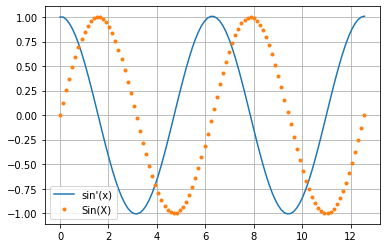

In [ ]:
#@title Teste de mesa
import numpy as np
import matplotlib.pyplot as plt
def doubl(n,tf):
  '''Retorna o plot da derivada de aproximação dupla'''
  dx = tf/n
  x = np.linspace(0,tf,n)
  dxdu = np.zeros(n)
 
  if np.sin(x[0]) == round(np.sin(x[-1]),4):
    dxdu[0] = (np.sin(x[2])-np.sin(x[-1]))/(2*dx)
    dxdu[n-1] = (np.sin(x[1])-np.sin(x[n-2]))/(2*dx)
    print('oi')
    
  for i in range(1,n-1):
    dxdu[i] = (np.sin(x[i+1])-np.sin(x[i-1]))/(2*dx)
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[1:-1],dxdu[1:-1],'+', label='D')
  return (e,x,dxdu)
n = 100
tf = 4*np.pi
A = doubl(n,tf)
#plt.plot(A[1],A[2],'+')
plt.plot(A[1],A[2], Label = 'sin\'(x)')
plt.plot(A[1],np.sin(A[1]),'.', Label = 'Sin(X)')
plt.grid()
plt.legend()
A[0]

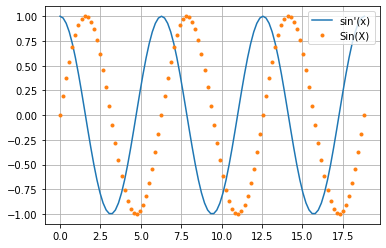

In [ ]:
#@title Teste de mesa
def tri(n,tf,f):
  '''
  Retorna o plot da derivada de aproximação tripla
  Parametros: 
  n: numero de pontos
  tf: valor limite do intervalo [0,tf] - deve ser definido como multiplo inteiro de 2pi
  f: função que a dericada é aplicada
  '''
 
  x = np.linspace(0,tf,n)
  dx = x[1]-x[0]
  dxdu = np.zeros(n)
  #x[-1](ultimo ponto) == X[0]
  dxdu[0] = (np.sin(x[-3])-6*np.sin(x[-2])+3*np.sin(x[0])+2*np.sin(x[1]))/(6*dx)
  dxdu[1] = (np.sin(x[-2])-6*np.sin(x[0])+3*np.sin(x[1])+2*np.sin(x[2]))/(6*dx)
  dxdu[n-1] = (np.sin(x[n-3])-6*np.sin(x[n-2])+3*np.sin(x[n-1])+2*np.sin(x[1]))/(6*dx)
  for i in range(2,n-1):
    dxdu[i] = (np.sin(x[i-2])-6*np.sin(x[i-1])+3*np.sin(x[i])+2*np.sin(x[i+1]))/(6*dx)
    e = abs(np.cos(x[i])-dxdu[i])
  #plt.plot(x[2:-1],dxdu[2:-1],'.', label='T')
  return (e,x,dxdu)

n = 100
tf = 6*np.pi
dx = tf/n
x = np.linspace(0,tf,n)
f = np.sin(x)
A = tri(n,tf,f)
#plt.plot(A[1],A[2],'+')
plt.plot(A[1],A[2], Label = 'sin\'(x)')
plt.plot(A[1],np.sin(A[1]),'.', Label = 'Sin(X)')
plt.grid()
plt.legend()